__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 640, 480, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 640, 480, 3)  12          input_2[0][0]                    
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 640, 480, 3)  84          conv1[0][0]                      
__________________________________________________________________________________________________
concat1 (Concatenate)           (None, 640, 480, 6)  0           conv1[0][0]                      
                                                                 conv2[0][0]                      
__________

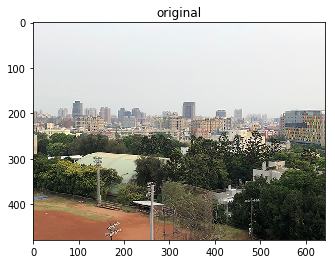

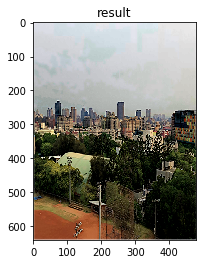

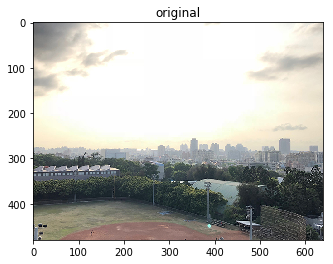

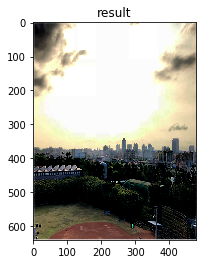

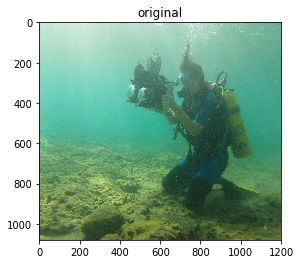

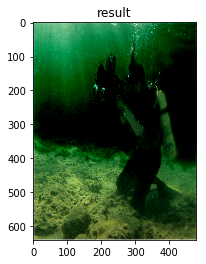

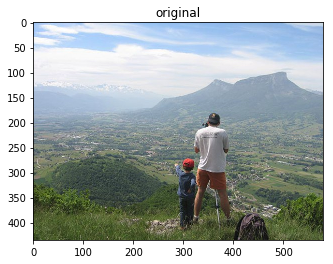

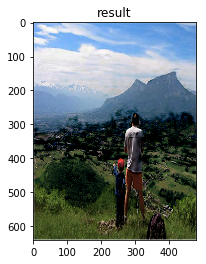

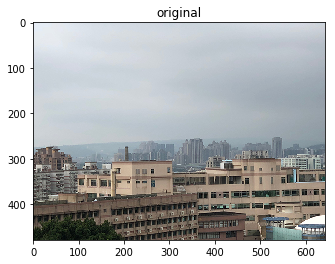

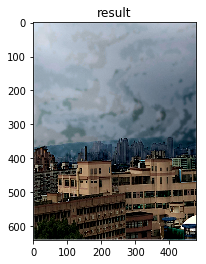

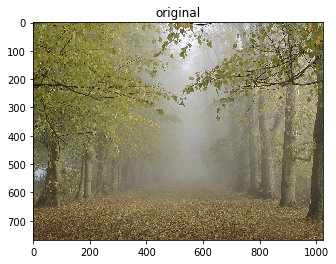

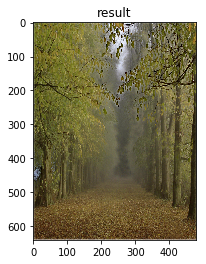

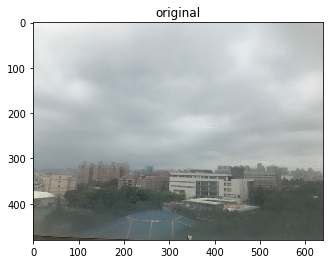

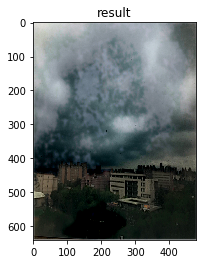

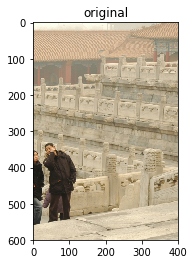

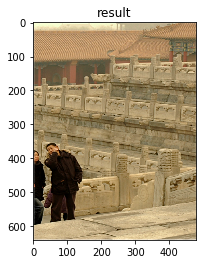

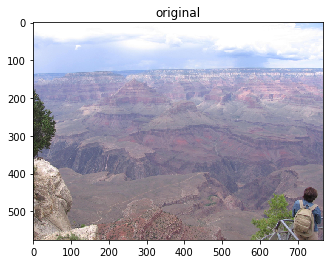

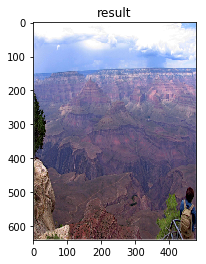

In [2]:
%matplotlib inline
from keras import backend as K
import AODNet_model
import os
import glob
import cv2
from math import ceil
from data_generate import generate
from preprocessing import getLabel_path
from preprocessing import ImageToArrayPreprocessor
from preprocessing import SimplePreprocessor
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import random
from keras.models import load_model
from keras.activations import relu
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="0"
batch_sizes=32
epochs=20
current_path=os.path.abspath(os.path.dirname("__file__"))
label_directory=os.path.join(os.path.abspath(os.path.dirname("__file__")),"label_image")
data_path=glob.glob(os.path.join(current_path,"test/*.jpg"))
sp = SimplePreprocessor(640, 480)
iap = ImageToArrayPreprocessor()
preprocessors=[sp, iap]
os.environ["CUDA_VISIBLE_DEVICES"]="0"
model=AODNet_model.AOD_Net(input_height=640,input_width=480,input_channel=3,b=1).creat_AODNet()
model.summary()
model.load_weights("model_file/AODNet_weights.h5",by_name=True)
opt=Adam(lr=0.01)
model.compile(loss="mean_squared_error", optimizer=opt)
print("[INFO] predict...")
def get_testData(path,preprocessors):
    image = cv2.imread(path)
    orig_img=image
    for p in preprocessors:
        image = p.preprocess(image)
    return (image.astype("float") / 255.0),orig_img
for path in data_path:
    test_x,orig_img=get_testData(path,preprocessors)
    test_y=model.predict(np.array([test_x]))
    test_y=(test_y*255.0).astype("uint8")
    cv2.imwrite("./result/"+os.path.basename(path),test_y[0])
    plt.figure("Image") # 图像窗口名称
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.axis('on') # 关掉坐标轴为 off
    plt.title('original') # 图像题目
    plt.show()
    plt.figure("Image") # 图像窗口名称
    plt.imshow(cv2.cvtColor(test_y[0], cv2.COLOR_BGR2RGB))
    plt.axis('on') # 关掉坐标轴为 off
    plt.title('result') # 图像题目
    plt.show()

In [ ]:
# 